In [1]:
import numpy as np

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([[0], [1], [1], [0]])  # Output

# Radial Basis Function (Gaussian)
def gaussian_rbf(x, center, sigma):
    return np.exp(-np.linalg.norm(x - center) ** 2 / (2 * sigma ** 2))

# Train RBFNN
def train_rbfn(X, y, num_centers=2, sigma=1.0):
    # Step 1: Select centers (typically randomly chosen from X)
    centers = np.array([[0, 1], [1, 0]])  # Manually selecting good centers for XOR
    sigma = sigma  # Fixed width for Gaussians

    # Step 2: Compute the RBF activations
    RBF_activations = np.array([[gaussian_rbf(x, c, sigma) for c in centers] for x in X])

    # Step 3: Compute output weights using pseudo-inverse
    W = np.linalg.pinv(RBF_activations) @ y
    return centers, W, sigma

# Predict function
def predict(X, centers, W, sigma):
    RBF_activations = np.array([[gaussian_rbf(x, c, sigma) for c in centers] for x in X])
    return (RBF_activations @ W).round()  # Threshold output to 0/1

# Train and Test
centers, W, sigma = train_rbfn(X, y)
predictions = predict(X, centers, W, sigma)

print("Predictions:", predictions.flatten())


Predictions: [0. 1. 1. 0.]


Normalized Neuron Weights (Hebbian): [-0. -0.]
Normalized Principal Component (PCA): [0.78692127 0.61705341]


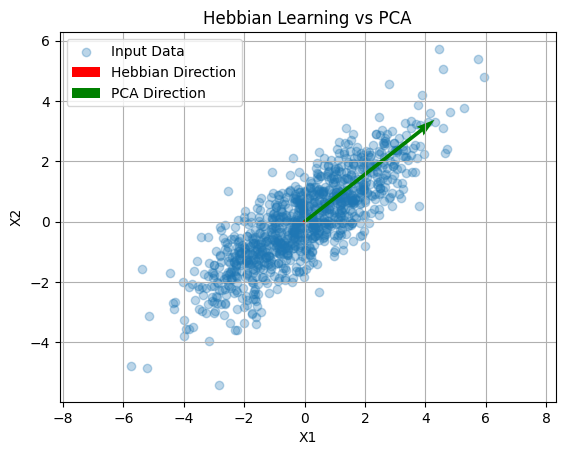

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Generate an arbitrary input distribution
def generate_data(samples=1000):
    """Generates data with a specified distribution."""
    mean = [0, 0] # Mean of the distribution
    cov = [[3, 2], [2, 2]] # Covariance matrix
    data = np.random.multivariate_normal(mean, cov, samples)
    return data
# Define a single linear neuron with Hebbian learning
class LinearNeuronHebbian:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim) # Initialize weights randomly
        self.learning_rate = learning_rate
    def train(self, data, epochs=1):
        """Train the neuron using Hebbian learning."""
        for epoch in range(epochs):
            for x in data:
                x = x.reshape(-1) # Ensure input is a 1D array
                y = np.dot(self.weights, x) # Neuron activation
                self.weights += self.learning_rate * y * x # Hebbian weight update
    def get_weights(self):
        return self.weights
# Generate input data
data = generate_data(samples=1000)
#Initialize and train the neuron
input_dim = data.shape[1]
learning_rate = 0.01
neuron = LinearNeuronHebbian(input_dim=input_dim, learning_rate=learning_rate)
# Train the neuron for multiple epochs
epochs = 10
neuron.train(data, epochs=epochs)
# Extract the principal component using PCA for comparison
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(data)
principal_component = pca.components_[0]
# Normalize the neuron's weights and principal component for comparison
weights_normalized = neuron.get_weights() / np.linalg.norm(neuron.get_weights())
principal_component_normalized = principal_component / np.linalg.norm(principal_component)
# Print results
print("Normalized Neuron Weights (Hebbian):", weights_normalized)
print("Normalized Principal Component (PCA):", principal_component_normalized)
# Visualize the data and learned direction
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Input Data")
plt.quiver(0, 0, weights_normalized[0], weights_normalized[1], color='r', scale=3, label="Hebbian Direction")
plt.quiver(0, 0, principal_component_normalized[0], principal_component_normalized[1], color='g', scale=3, label="PCA Direction")
plt.legend()
plt.title("Hebbian Learning vs PCA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.axis('equal')
plt.show()